In [41]:
#Import library for data cleaning and analysis
import pandas as pd

# Load the data
netflix_data = pd.read_csv('netflix_titles.csv')

#Display first 5 rows
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [42]:
# Check for missing values
missing_values = netflix_data.isnull().sum()

#Print number of missing values within each column
print("Missing Values:\n", missing_values)

Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [43]:
# Fill missing values in columns with a large number of nulls
netflix_data['director'].fillna('Unknown', inplace=True)
netflix_data['cast'].fillna('Unknown', inplace=True)
netflix_data['country'].fillna('Unknown', inplace=True)

# Drop rows with null values in columns where only a few rows are missing ('date_added', 'rating', or 'duration')
netflix_data.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

# Check for missing values again to confirm all have been addressed
missing_values = netflix_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [44]:
# Check for duplicates
duplicates = netflix_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [45]:
# Change 'date_added' to a date format
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')

# Show the first 5 rows to check the result
print(netflix_data['date_added'].head())

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]


In [46]:
# Count rows where `release_year` is greater than the year in `date_added`
inconsistent_count = (netflix_data['release_year'] > netflix_data['date_added'].dt.year).sum()
display(f"Number of inconsistent rows: {inconsistent_count}")

# Display the rows with the error
inconsistent_data = netflix_data.loc[netflix_data['release_year'] > netflix_data['date_added'].dt.year]
display(inconsistent_data)

'Number of inconsistent rows: 14'

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1551,s1552,TV Show,Hilda,Unknown,"Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nelso...","United Kingdom, Canada, United States",2020-12-14,2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend..."
1696,s1697,TV Show,Polly Pocket,Unknown,"Emily Tennant, Shannon Chan-Kent, Kazumi Evans...","Canada, United States, Ireland",2020-11-15,2021,TV-Y,2 Seasons,Kids' TV,After uncovering a magical locket that allows ...
2920,s2921,TV Show,Love Is Blind,Unknown,"Nick Lachey, Vanessa Lachey",United States,2020-02-13,2021,TV-MA,1 Season,"Reality TV, Romantic TV Shows",Nick and Vanessa Lachey host this social exper...
3168,s3169,TV Show,Fuller House,Unknown,"Candace Cameron Bure, Jodie Sweetin, Andrea Ba...",United States,2019-12-06,2020,TV-PG,5 Seasons,TV Comedies,The Tanner family’s adventures continue as DJ ...
3287,s3288,TV Show,Maradona in Mexico,Unknown,Diego Armando Maradona,"Argentina, United States, Mexico",2019-11-13,2020,TV-MA,1 Season,"Docuseries, Spanish-Language TV Shows","In this docuseries, soccer great Diego Maradon..."
3369,s3370,TV Show,BoJack Horseman,Unknown,"Will Arnett, Aaron Paul, Amy Sedaris, Alison B...",United States,2019-10-25,2020,TV-MA,6 Seasons,TV Comedies,Meet the most beloved sitcom horse of the '90s...
3433,s3434,TV Show,The Hook Up Plan,Unknown,"Marc Ruchmann, Zita Hanrot, Sabrina Ouazani, J...",France,2019-10-11,2020,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...","When Parisian Elsa gets hung up on her ex, her..."
4844,s4845,TV Show,Unbreakable Kimmy Schmidt,Unknown,"Ellie Kemper, Jane Krakowski, Tituss Burgess, ...",United States,2018-05-30,2019,TV-14,4 Seasons,TV Comedies,When a woman is rescued from a doomsday cult a...
4845,s4846,TV Show,Arrested Development,Unknown,"Jason Bateman, Portia de Rossi, Will Arnett, M...",United States,2018-05-29,2019,TV-MA,5 Seasons,TV Comedies,It's the Emmy-winning story of a wealthy famil...
5394,s5395,Movie,Hans Teeuwen: Real Rancour,Doesjka van Hoogdalem,Hans Teeuwen,Netherlands,2017-07-01,2018,TV-MA,86 min,Stand-Up Comedy,Comedian Hans Teeuwen rebels against political...


In [47]:
# Use logical conditioning to remove rows where `release_year` is greater than the year in `date_added`
cleaned_data = netflix_data[netflix_data['release_year'] <= netflix_data['date_added'].dt.year]

# Confirm removal by checking the remaining inconsistencies
remaining_inconsistent_count = (cleaned_data['release_year'] > cleaned_data['date_added'].dt.year).sum()
print(f"Number of remaining inconsistent rows: {remaining_inconsistent_count}")

Number of remaining inconsistent rows: 0


In [48]:
# Save the cleaned dataset to a new CSV file
cleaned_data.to_csv('cleaned_netflix_data.csv', index=False)

<Axes: title={'center': 'Contrast TV Rating of the movie / show'}, xlabel='rating'>

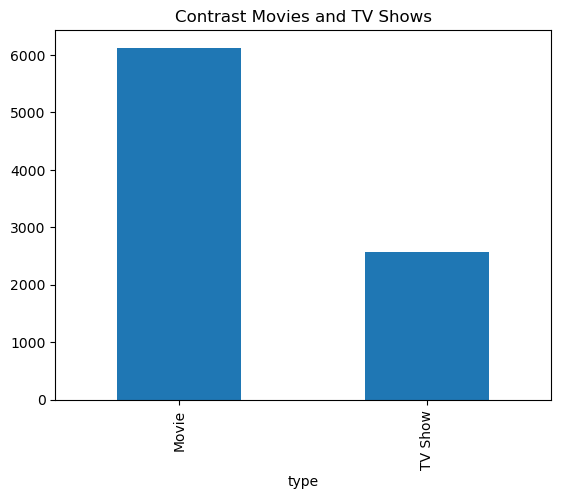

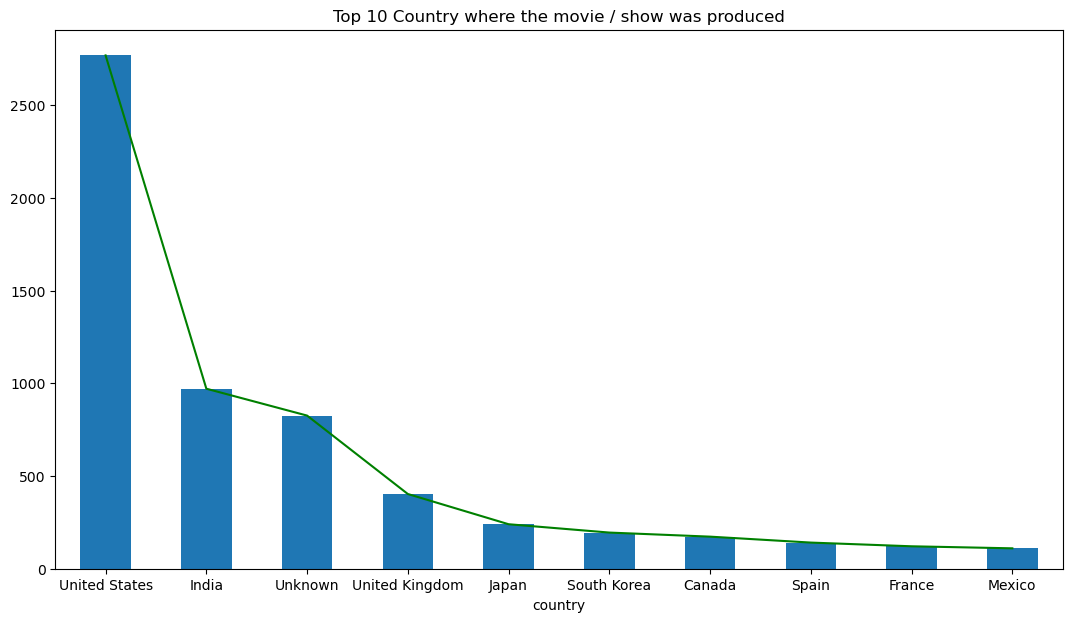

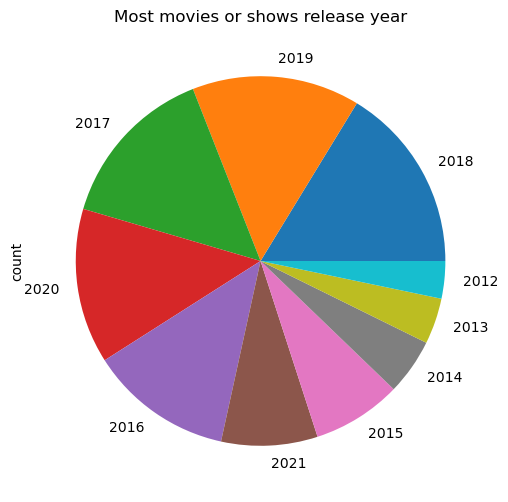

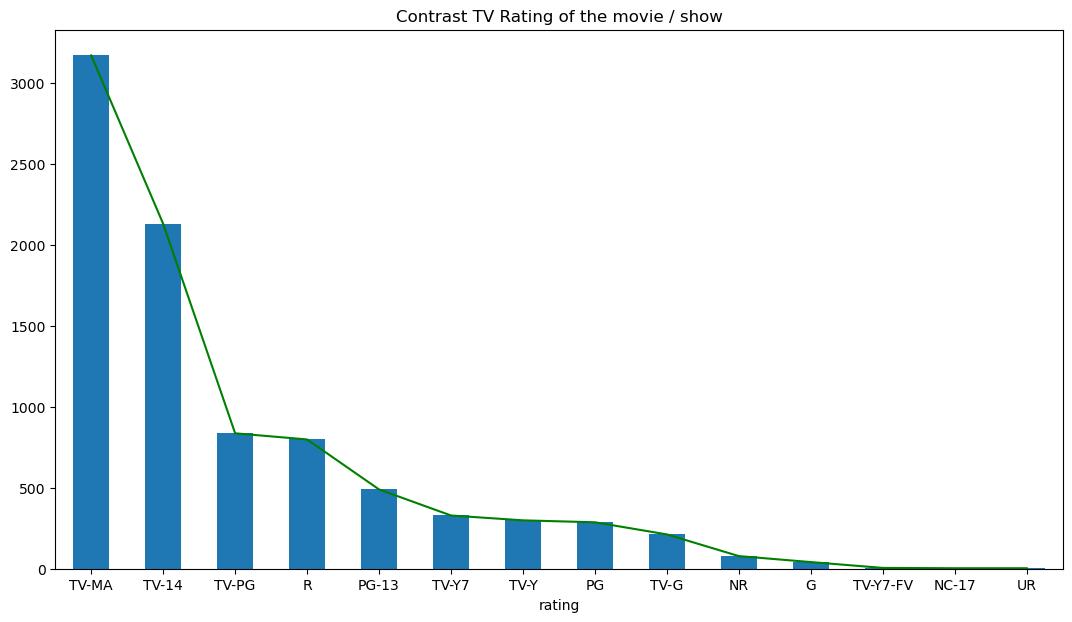

In [49]:
import matplotlib.pyplot as plt

# Count and Contrast Movies and TV Shows
type_count = cleaned_data['type'].value_counts()
type_count.plot(kind='bar',title='Contrast Movies and TV Shows')

# Top 10 Country where the movie / show was produced
top_countries_count = cleaned_data['country'].value_counts()[:10]
plt.figure(figsize=(13,7))
top_countries_count.plot(kind='bar',title='Top 10 Country where the movie / show was produced')
top_countries_count.plot(kind='line',color=['g'])

# Most movies or shows release year
release_year_count = cleaned_data['release_year'].value_counts()[:10]
plt.figure(figsize=(12,6))
release_year_count.plot(kind='pie',title='Most movies or shows release year')

# Contrast TV Rating of the movie / show
rating_count = cleaned_data['rating'].value_counts()
plt.figure(figsize=(13,7))
rating_count.plot(kind='bar',title='Contrast TV Rating of the movie / show')
rating_count.plot(kind='line',color=['g'])

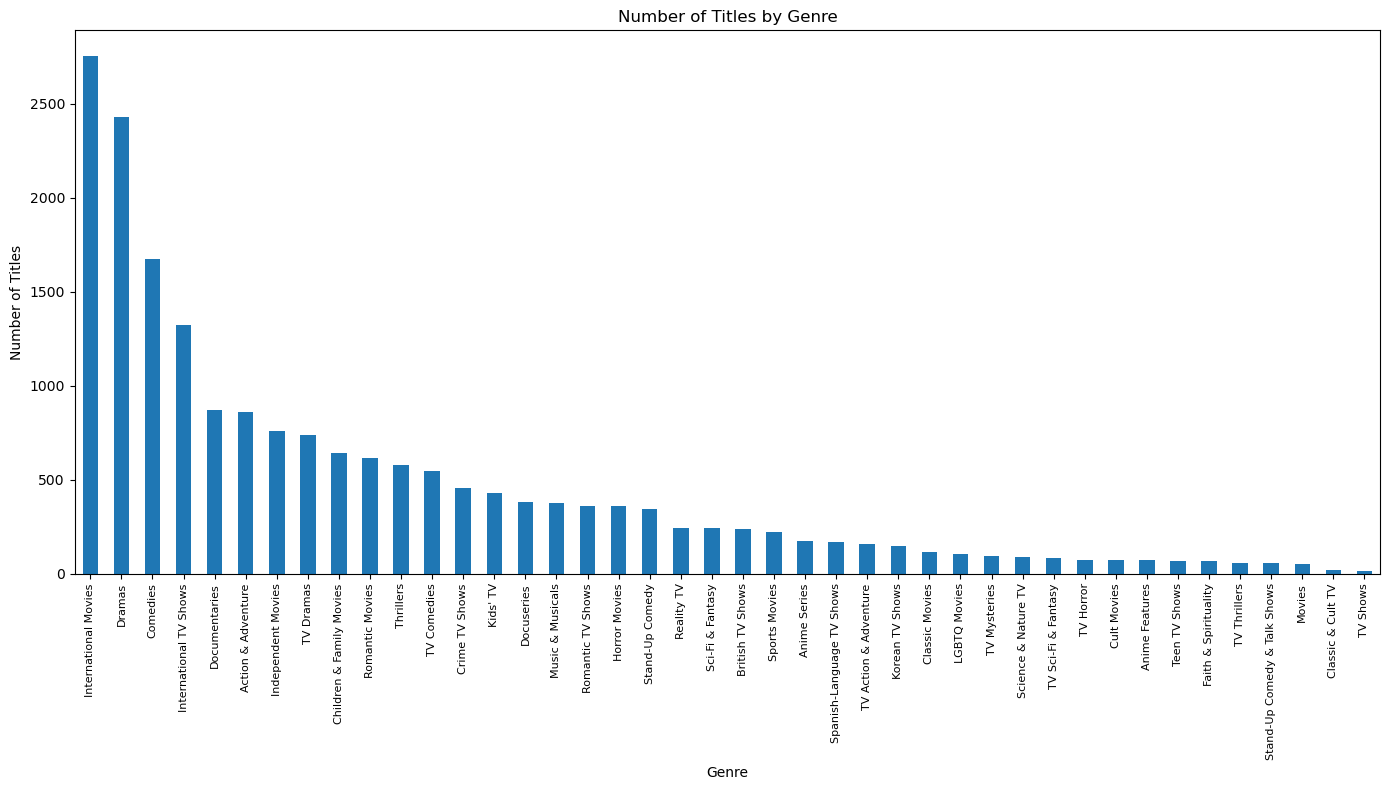

Aggregated Statistics by Genre:
                             numeric_duration release_year            
                                         mean         mean   min   max
genre                                                                 
TV Mysteries                         2.074468  2018.478723  2001  2021
TV Horror                            2.013889  2018.319444  2008  2021
Reality TV                           1.518519  2017.975309  1988  2021
Stand-Up Comedy & Talk Shows         1.777778  2017.907407  2007  2021
Crime TV Shows                       1.652079  2017.754923  1990  2021
TV Thrillers                         2.053571  2017.732143  1998  2021
Spanish-Language TV Shows            1.497006  2017.550898  1979  2021
TV Action & Adventure                2.293750  2017.493750  1993  2021
TV Dramas                            1.755435  2017.316576  1986  2021
Docuseries                           1.277045  2017.279683  1988  2021
International TV Shows               1.392749

<Figure size 1200x600 with 0 Axes>

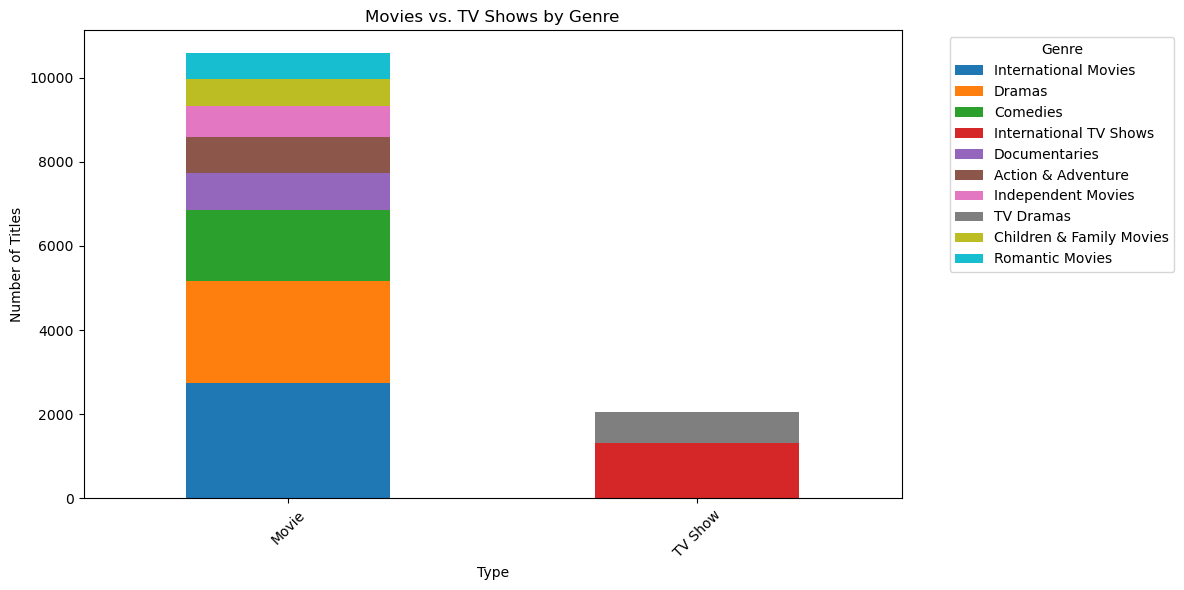

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
data = pd.read_csv("cleaned_netflix_data.csv")

# Fill missing values in 'listed_in' (genres)
data['listed_in'] = data['listed_in'].fillna('Unknown')

# Extract numbers from 'duration' column
data['numeric_duration'] = data['duration'].str.extract(r'(\d+)').astype(float)

# Split genres into multiple rows
data_genres = data.assign(genre=data['listed_in'].str.split(', ')).explode('genre')

# Count the number of titles in each genre
genre_count = data_genres.groupby('genre').size().sort_values(ascending=False)

# Plot number of titles by genre
plt.figure(figsize=(14, 8))
genre_count.plot(kind='bar', title='Number of Titles by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90, fontsize=8)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Get average duration and min/max release year by genre
genre_stats = data_genres.groupby('genre').agg({
    'numeric_duration': 'mean',
    'release_year': ['mean', 'min', 'max']
}).sort_values(('release_year', 'mean'), ascending=False)

# Show genre statistics
print("Aggregated Statistics by Genre:")
print(genre_stats)

# Compare Movies vs. TV Shows by genre
type_genre_count = data_genres.groupby(['type', 'genre']).size().unstack(fill_value=0)

# Plot top 10 genres for Movies vs. TV Shows
type_genre_count_top10 = type_genre_count.loc[:, genre_count.index[:10]]

plt.figure(figsize=(12, 6))
type_genre_count_top10.plot(kind='bar', stacked=True, figsize=(12, 6), title='Movies vs. TV Shows by Genre')
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

